# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Final Project Group 40: Trump Tweets and Market Volatility


**Harvard University**<br/>
**Fall 2019**<br/>
**Group**: Dylan DeMarco, Daiki Ina, Roger Zhang, Jerry Huang

<hr style="height:2pt">

In [7]:
import requests
from IPython.core.display import HTML, display
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [8]:
import requests
from IPython.core.display import HTML, display
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

# import pandas_profiling

## DWJ and VIX comparison

In [9]:
"""
Sourced from the creators of vix (trustworthy source IMO) -- cboe
http://www.cboe.com/products/vix-index-volatility/vix-options-and-futures/vix-index/vix-historical-data
download 2004 -> present and subset the csv below.
VIX Open, VIX High, VIX Low, VIX close have to be converted into float object
"""
vix_full = pd.read_csv('./data/vix_scraped_11_08_2019.csv')
vix_full = vix_full.rename(columns=vix_full.iloc[0]).drop(vix_full.index[0])
vix_full.Date = pd.to_datetime(vix_full.Date)

vix_election_to_present = vix_full[vix_full['Date'] >= pd.Timestamp('11/09/2016')]
vix_election_to_present.to_csv('./data/raw/vix_data.csv')

In [10]:
vix_election_to_present.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 754 entries, 3238 to 3991
Data columns (total 5 columns):
Date         754 non-null datetime64[ns]
VIX Open     754 non-null object
VIX High     754 non-null object
VIX Low      754 non-null object
VIX Close    754 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 35.3+ KB


In [11]:
vix_election_to_present['VIX Open'] = vix_election_to_present['VIX Open'].astype(float)
vix_election_to_present['VIX High'] = vix_election_to_present['VIX High'].astype(float)
vix_election_to_present['VIX Low'] = vix_election_to_present['VIX Low'].astype(float)
vix_election_to_present['VIX Close'] = vix_election_to_present['VIX Close'].astype(float)
vix_election_to_present['VIX Range'] = vix_election_to_present['VIX High'] - vix_election_to_present['VIX Low']
vix_election_to_present['VIX Change'] = vix_election_to_present['VIX Close'] - vix_election_to_present['VIX Open']

/Users/ruoqizhang/anaconda3/envs/tfcs109a/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/ruoqizhang/anaconda3/envs/tfcs109a/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ruoqizhang/anaconda3/envs/tfcs109a/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [12]:
vix_election_to_present['m_y']= pd.to_datetime(vix_election_to_present.Date).dt.to_period('M')

/Users/ruoqizhang/anaconda3/envs/tfcs109a/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
vix_election_to_present.corr()

,VIX Open,VIX High,VIX Low,VIX Close,VIX Range,VIX Change
VIX Open,1.000000,0.961973,0.977351,0.943093,0.616517,-0.170310
VIX High,0.961973,1.000000,0.945700,0.975007,0.777008,0.037011
VIX Low,0.977351,0.945700,1.000000,0.958102,0.530206,-0.058680
VIX Close,0.943093,0.975007,0.958102,1.000000,0.687795,0.167052
VIX Range,0.616517,0.777008,0.530206,0.687795,1.000000,0.210187
VIX Change,-0.170310,0.037011,-0.058680,0.167052,0.210187,1.000000


In [14]:
vix_open = vix_election_to_present['VIX Open']
vix_open

3238    20.70
3239    14.01
3240    14.83
3241    14.69
3242    14.16
        ...  
3987    12.99
3988    12.68
3989    12.85
3990    13.18
3991    12.59
Name: VIX Open, Length: 754, dtype: float64

# Load the Dow Jones data

In [15]:
dwj_election_to_present = pd.read_csv('./data/DJI.csv', header = 0)
# look at the raw dara
dwj_election_to_present.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-09,18317.259766,18650.060547,18252.550781,18589.689453,18589.689453,173110000
1,2016-11-10,18603.140625,18873.660156,18603.140625,18807.880859,18807.880859,164390000
2,2016-11-11,18781.650391,18855.779297,18736.960938,18847.660156,18847.660156,107300000
3,2016-11-14,18876.769531,18934.050781,18815.750000,18868.689453,18868.689453,112250000
4,2016-11-15,18858.210938,18925.259766,18806.060547,18923.060547,18923.060547,100660000


In [16]:
# rename and get the correspodning variable for DWJ
dwj_election_to_present.rename(columns={'Open':'DWJ Open', 'High':'DWJ High', 'Low':'DWJ Low', 'Close':'DWJ Close'}, inplace=True)
dwj_election_to_present = dwj_election_to_present.iloc[:,0:5]
dwj_election_to_present['DWJ Open'] = dwj_election_to_present['DWJ Open'].astype(float)
dwj_election_to_present['DWJ High'] = dwj_election_to_present['DWJ High'].astype(float)
dwj_election_to_present['DWJ Low'] = dwj_election_to_present['DWJ Low'].astype(float)
dwj_election_to_present['DWJ Close'] = dwj_election_to_present['DWJ Close'].astype(float)
dwj_election_to_present['DWJ Range'] = dwj_election_to_present['DWJ High'] - dwj_election_to_present['DWJ Low']
dwj_election_to_present['DWJ Change'] = dwj_election_to_present['DWJ Close'] - dwj_election_to_present['DWJ Open']

dwj_election_to_present.corr()

,DWJ Open,DWJ High,DWJ Low,DWJ Close,DWJ Range,DWJ Change
DWJ Open,1.000000,0.998954,0.997978,0.997170,0.297446,-0.074763
DWJ High,0.998954,1.000000,0.997382,0.998324,0.319265,-0.045552
DWJ Low,0.997978,0.997382,1.000000,0.998651,0.249903,-0.028227
DWJ Close,0.997170,0.998324,0.998651,1.000000,0.280186,0.000411
DWJ Range,0.297446,0.319265,0.249903,0.280186,1.000000,-0.240031
DWJ Change,-0.074763,-0.045552,-0.028227,0.000411,-0.240031,1.000000


DWJ has higher correlations than VIX among Open, High, Low, and Close values 

# Examine the VIX Open variable

In [17]:
# correlation between VIX open and DWJ variables

for i in range(6):
    column = dwj_election_to_present.columns[i+1]
    correlation = np.corrcoef(vix_election_to_present['VIX Open'], dwj_election_to_present[column])[0,1]
    print('The correlation between VIX Open and {} is {}'.format(column, correlation))


The correlation between VIX Open and DWJ Open is 0.29281610873794783
The correlation between VIX Open and DWJ High is 0.3164487278215938
The correlation between VIX Open and DWJ Low is 0.26748131865250174
The correlation between VIX Open and DWJ Close is 0.2949194703411257
The correlation between VIX Open and DWJ Range is 0.7319134263769351
The correlation between VIX Open and DWJ Change is 0.017000663957385018


In [18]:
for i in range(6):
    column = dwj_election_to_present.columns[i+1]
    correlation = np.corrcoef(vix_election_to_present['VIX High'], dwj_election_to_present[column])[0,1]
    print('The correlation between VIX High and {} is {}'.format(column, correlation))

The correlation between VIX High and DWJ Open is 0.28818738111272263
The correlation between VIX High and DWJ High is 0.30895080153158344
The correlation between VIX High and DWJ Low is 0.25205232369329983
The correlation between VIX High and DWJ Close is 0.2797602663792978
The correlation between VIX High and DWJ Range is 0.8337169454851409
The correlation between VIX High and DWJ Change is -0.1225178043025567


In [19]:
for i in range(6):
    column = dwj_election_to_present.columns[i+1]
    correlation = np.corrcoef(vix_election_to_present['VIX Low'], dwj_election_to_present[column])[0,1]
    print('The correlation between VIX Low and {} is {}'.format(column, correlation))

The correlation between VIX Low and DWJ Open is 0.3194088798965943
The correlation between VIX Low and DWJ High is 0.33889445355237385
The correlation between VIX Low and DWJ Low is 0.29192900393512056
The correlation between VIX Low and DWJ Close is 0.3157933460427876
The correlation between VIX Low and DWJ Range is 0.7120729388721283
The correlation between VIX Low and DWJ Change is -0.05985268916011022


In [20]:
for i in range(6):
    column = dwj_election_to_present.columns[i+1]
    correlation = np.corrcoef(vix_election_to_present['VIX Close'], dwj_election_to_present[column])[0,1]
    print('The correlation between VIX Close and {} is {}'.format(column, correlation))

The correlation between VIX Close and DWJ Open is 0.31205047958228604
The correlation between VIX Close and DWJ High is 0.32932851826024356
The correlation between VIX Close and DWJ Low is 0.27442243417340695
The correlation between VIX Close and DWJ Close is 0.295721383325361
The correlation between VIX Close and DWJ Range is 0.8134125286358099
The correlation between VIX Close and DWJ Change is -0.2282290051485141


In [21]:
for i in range(6):
    column = dwj_election_to_present.columns[i+1]
    correlation = np.corrcoef(vix_election_to_present['VIX Range'], dwj_election_to_present[column])[0,1]
    print('The correlation between VIX Range and {} is {}'.format(column, correlation))

The correlation between VIX Range and DWJ Open is 0.13315288542448037
The correlation between VIX Range and DWJ High is 0.14957749020443972
The correlation between VIX Range and DWJ Low is 0.09211354584523232
The correlation between VIX Range and DWJ Close is 0.11817278649536524
The correlation between VIX Range and DWJ Range is 0.7957131143242879
The correlation between VIX Range and DWJ Change is -0.20367387389272543


In [22]:
for i in range(6):
    column = dwj_election_to_present.columns[i+1]
    correlation = np.corrcoef(vix_election_to_present['VIX Change'], dwj_election_to_present[column])[0,1]
    print('The correlation between VIX Change and {} is {}'.format(column, correlation))

The correlation between VIX Change and DWJ Open is 0.056506779663225544
The correlation between VIX Change and DWJ High is 0.03763641845123222
The correlation between VIX Change and DWJ Low is 0.020120271013511902
The correlation between VIX Change and DWJ Close is 0.001881764135607824
The correlation between VIX Change and DWJ Range is 0.24028148584203277
The correlation between VIX Change and DWJ Change is -0.7267253827379618


# Comparioson between VIX Open and DWJ open 

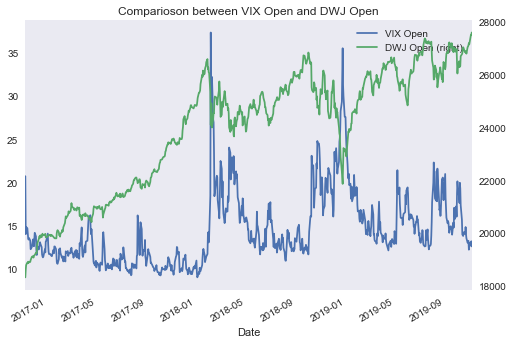

In [23]:
plt.style.use('seaborn')
sns.set_style( {'axes.grid': False})
vix_open = vix_election_to_present['VIX Open'].values
dwj_open = dwj_election_to_present['DWJ Open'].values
date = vix_election_to_present['Date'].values
m_y = vix_election_to_present['m_y'].values
d = {'VIX Open': vix_open, 'DWJ Open': dwj_open, 'Date': date}
df = pd.DataFrame(data=d)
df.set_index("Date",drop=True,inplace=True)
df.plot(secondary_y=['DWJ Open'],grid=False, use_index=True)
plt.title("Comparioson between VIX Open and DWJ Open")
plt.show()

# Comparioson between VIX Open and DWJ Range 

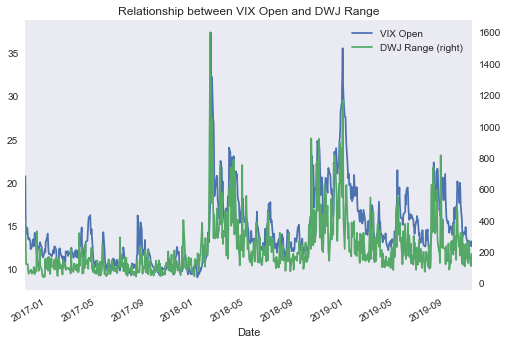

In [24]:
plt.style.use('seaborn')
sns.set_style( {'axes.grid': False})
vix_open = vix_election_to_present['VIX Open'].values
dwj_range = dwj_election_to_present['DWJ Range'].values
date = vix_election_to_present['Date'].values
m_y = vix_election_to_present['m_y'].values
d = {'VIX Open': vix_open, 'DWJ Range': dwj_range, 'Date': date}
df = pd.DataFrame(data=d)
df.set_index("Date",drop=True,inplace=True)
ax = df.plot(secondary_y=['DWJ Range'], grid=False, use_index=True)
plt.title("Relationship between VIX Open and DWJ Range")
plt.show() 



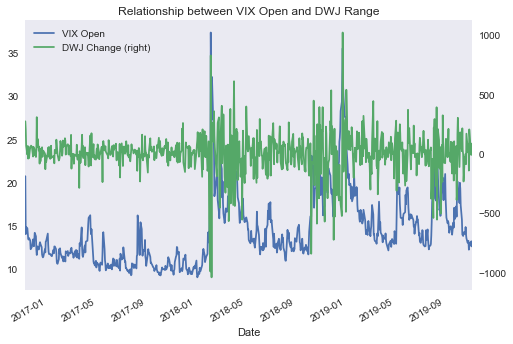

In [25]:
import seaborn as sns


dwj_change = dwj_election_to_present['DWJ Change'].values
d = {'VIX Open': vix_open, 'DWJ Change': dwj_change, 'Date': date}
df = pd.DataFrame(data=d)

plt.style.use('seaborn')
sns.set_style( {'axes.grid': False})
vix_open = vix_election_to_present['VIX Open'].values
dwj_change = dwj_election_to_present['DWJ Change'].values
date = vix_election_to_present['Date'].values
m_y = vix_election_to_present['m_y'].values
d = {'VIX Open': vix_open, 'DWJ Change': dwj_change, 'Date': date}
df = pd.DataFrame(data=d)
df.set_index("Date",drop=True,inplace=True)
ax = df.plot(secondary_y=['DWJ Change'], grid=False, use_index=True)
plt.title("Relationship between VIX Open and DWJ Range")
plt.show() 


There is little correlation between VIX open and the DWJ variables (Left Graph) (Open, High, Low, Close). The correlation coefficient is  0.29, 0.32, 0.27, and  0.29 respectively. The DWJ range (DWJ High - DWJ Low) (Right Graph), however, shows a strong correlation with VIX open. 
The basic DWJ variables (Open, High, Low, Close) tell us only about the strength of the US economy. As the US economy keeps growing, the general trend of DWJ variables is just a rise. On the other hand, the DWJ range is the slope of economic growth, which tells us how sharply the US economy changes each day. This is exactly the same as volatility. This is why the DWJ range and VIX open are highly correlated.


In [26]:
vix_election_to_present['DWJ Range'] = dwj_range

/Users/ruoqizhang/anaconda3/envs/tfcs109a/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
cor_1 = np.corrcoef(vix_open,dwj_range)[0,1]
cor_2 = np.corrcoef(vix_open[1:],dwj_range[:-1])[0,1]
cor_3 = np.corrcoef(vix_open[2:],dwj_range[:-2])[0,1]
cor_4 = np.corrcoef(vix_open[3:],dwj_range[:-3])[0,1]
cor_5 = np.corrcoef(vix_open[4:],dwj_range[:-4])[0,1]

cor_last2 = np.corrcoef((vix_open[2:-1],dwj_range[1:-2] + dwj_range[:-3]))[0,1]
cor_last3 = np.corrcoef((vix_open[3:-1],dwj_range[2:-2] + dwj_range[1:-3] + dwj_range[:-4]))[0,1]
cor_last4 = np.corrcoef((vix_open[4:-1],dwj_range[3:-2] + dwj_range[2:-3] + dwj_range[1:-4] + dwj_range[:-5]))[0,1]
cor_last5 = np.corrcoef((vix_open[5:-1],dwj_range[4:-2] + dwj_range[3:-3] + dwj_range[2:-4] + dwj_range[1:-5] + dwj_range[:-6]))[0,1]
cor_last6 = np.corrcoef((vix_open[6:-1],dwj_range[5:-2] + dwj_range[4:-3] + dwj_range[3:-4] + dwj_range[2:-5] + dwj_range[1:-6]+dwj_range[:-7]))[0,1]

print("VIX vs DWJ of the same day", np.corrcoef(vix_open,dwj_range)[0,1])
print("VIX vs DWJ of one day before", np.corrcoef(vix_open[1:],dwj_range[:-1])[0,1])
print("VIX vs DWJ of two days before", np.corrcoef(vix_open[2:],dwj_range[:-2])[0,1])
print("VIX vs DWJ of three days before", np.corrcoef(vix_open[3:],dwj_range[:-3])[0,1])
print("VIX vs DWJ of four days before", np.corrcoef(vix_open[4:],dwj_range[:-4])[0,1])
print("")
print("VIX vs DWJ of the last 2 days before", np.corrcoef((vix_open[2:-1],dwj_range[1:-2] + dwj_range[:-3]))[0,1])
print("VIX vs DWJ of the last 3 days before", np.corrcoef((vix_open[3:-1],dwj_range[2:-2] + dwj_range[1:-3] + dwj_range[:-4]))[0,1])
print("VIX vs DWJ of the last 4 days before", np.corrcoef((vix_open[4:-1],dwj_range[3:-2] + dwj_range[2:-3] + dwj_range[1:-4] + dwj_range[:-5]))[0,1])
print("VIX vs DWJ of the last 5 days before", np.corrcoef((vix_open[5:-1],dwj_range[4:-2] + dwj_range[3:-3] + dwj_range[2:-4] + dwj_range[1:-5] + dwj_range[:-6]))[0,1])
print("VIX vs DWJ of the last 6 days before", np.corrcoef((vix_open[6:-1],dwj_range[5:-2] + dwj_range[4:-3] + dwj_range[3:-4] + dwj_range[2:-5] + dwj_range[1:-6]+dwj_range[:-7]))[0,1])

VIX vs DWJ of the same day 0.7319134263769351
VIX vs DWJ of one day before 0.807786984254492
VIX vs DWJ of two days before 0.7808545903830738
VIX vs DWJ of three days before 0.7438819528678823
VIX vs DWJ of four days before 0.7156154244843509

VIX vs DWJ of the last 2 days before 0.869037473554365
VIX vs DWJ of the last 3 days before 0.889408842805407
VIX vs DWJ of the last 4 days before 0.8968086036411731
VIX vs DWJ of the last 5 days before 0.893541154438067
VIX vs DWJ of the last 6 days before 0.8902876820636813


In [28]:
from sklearn.linear_model import LinearRegression
Y = vix_open[4:-1]
X1 = dwj_range[3:-2]
X2 = dwj_range[2:-3]
X3 = dwj_range[1:-4] 
X4 = dwj_range[:-5]
X = np.array([X1, X2, X3, X4]).T
X.shape
reg = LinearRegression().fit(X, Y)
reg.score(X, Y)

# use coef as weights
reg.coef_

array([0.00955245, 0.00614438, 0.00455122, 0.00474238])

In [29]:
w1 = 0.00614438/0.00955245
w2 = 0.00455122/0.00955245
w3 = 0.00474238/0.00955245

print("VIX vs DWJ of the weighted average of the last 4 days before", np.corrcoef((vix_open[4:-1], dwj_range[3:-2] + w1*dwj_range[2:-3] + w2*dwj_range[1:-4] + w3*dwj_range[:-5]))[0,1])
print("There is not much improvement by using weighted average")

VIX vs DWJ of the weighted average of the last 4 days before 0.9038576569951504
There is not much improvement by using weighted average


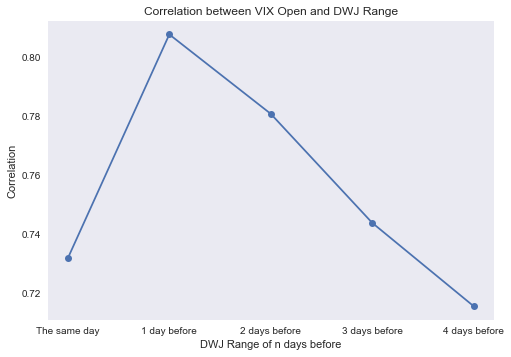

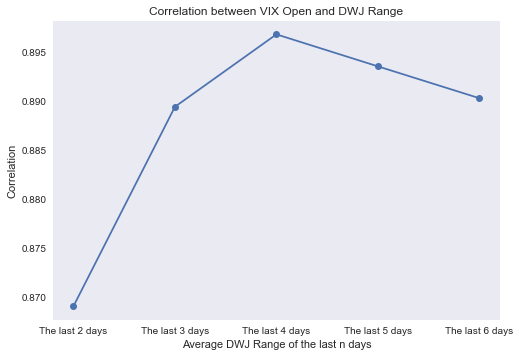

In [30]:
# plot
plt.plot([0,1,2,3,4], [cor_1, cor_2, cor_3, cor_4, cor_5], 'bo-')
plt.ylabel('Correlation')
plt.xlabel('DWJ Range of n days before')
plt.xticks([0,1,2,3,4], ('The same day', '1 day before', '2 days before', '3 days before', '4 days before'))
plt.title('Correlation between VIX Open and DWJ Range')
plt.show()

# plot
plt.plot([2,3,4,5,6], [cor_last2, cor_last3, cor_last4, cor_last5, cor_last6], 'bo-')
plt.ylabel('Correlation')
plt.xlabel('Average DWJ Range of the last n days')
plt.xticks([2,3,4,5,6], ('The last 2 days', 'The last 3 days', 'The last 4 days', 'The last 5 days', 'The last 6 days'))
plt.title('Correlation between VIX Open and DWJ Range')
plt.show()


It is useful to include “deltas” of features (the daily change of the VIX in this case) in our model. This is because a change in Trump’s routine activity/topics he tweets about could contain information that the market reacts to

From the above plots, it looks DWJ Range of the last 4 days is the most highly corrlearted with the VIX Open, so we decided to use DWJ Range of the last 4 days as deltas included in the prediction model along with Trump's tweet data.

/Users/ruoqizhang/anaconda3/envs/tfcs109a/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


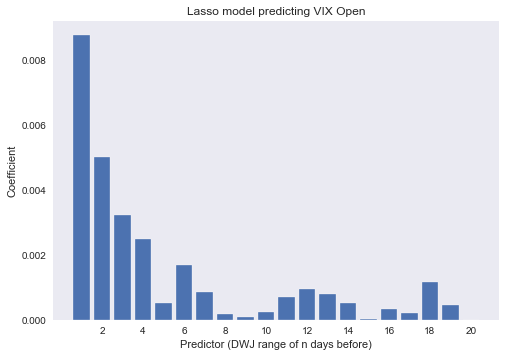

0.8607794870774516

In [31]:
# linear model

from sklearn.linear_model import LinearRegression
Y = vix_open[21:-1]
X1 = dwj_range[20:-2]
X2 = dwj_range[19:-3]
X3 = dwj_range[18:-4] 
X4 = dwj_range[17:-5]
X5 = dwj_range[16:-6]
X6 = dwj_range[15:-7]
X7 = dwj_range[14:-8]
X8 = dwj_range[13:-9]
X9 = dwj_range[12:-10]
X10 = dwj_range[11:-11]
X11 = dwj_range[10:-12]
X12 = dwj_range[9:-13]
X13 = dwj_range[8:-14]
X14 = dwj_range[7:-15]
X15 = dwj_range[6:-16]
X16 = dwj_range[5:-17]
X17 = dwj_range[4:-18]
X18 = dwj_range[3:-19]
X19 = dwj_range[2:-20]
X20 = dwj_range[1:-21]

X = np.array([X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20]).T
X.shape

reg = LinearRegression().fit(X, Y)
reg.score(X, Y)

# use coef as weights
from sklearn import linear_model
alphas = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
clf = linear_model.LassoCV(alphas=alphas)
clf.fit(X, Y)


days = np.arange(1,21,1)
plt.bar(x = days, height = clf.coef_.flatten())
plt.title("Lasso model predicting VIX Open")
plt.xlabel('Predictor (DWJ range of n days before)')
plt.ylabel('Coefficient')
plt.xticks([2,4,6,8,10,12,14,16,18,20],['2','4','6','8','10','12','14','16','18','20'])
plt.show()
clf.score(X,Y)

From the lasso model, DWJ range of up to the last 4 days are relatively importnat compared to the days earlier than them.
Using the lasso model as a variable selector, these results back up the reasoning of choosing the last 4 days as deltas included in the prediction model along with Trump's tweet data.
All coefficients 

/Users/ruoqizhang/anaconda3/envs/tfcs109a/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


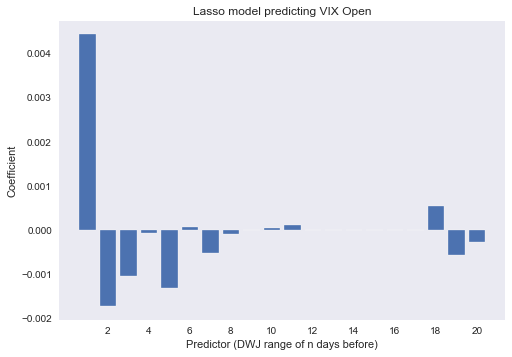

0.22275626889609124

In [32]:
from sklearn.preprocessing import PolynomialFeatures


Y_change = vix_open[21:-1] - vix_open[20:-2]
X = np.array([X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20]).T
X.shape

reg = LinearRegression().fit(X, Y)
reg.score(X, Y)

alphas = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
clf = linear_model.LassoCV(alphas=alphas)
clf.fit(X, Y_change)


days = np.arange(1,21,1)
plt.bar(x = days, height = clf.coef_.flatten())
plt.title("Lasso model predicting VIX Open")
plt.xlabel('Predictor (DWJ range of n days before)')
plt.ylabel('Coefficient')
plt.xticks([2,4,6,8,10,12,14,16,18,20],['2','4','6','8','10','12','14','16','18','20'])
plt.show()
clf.score(X, Y_change)

In [33]:
collection_date = '2019-11-07'
tweet_df = pd.read_csv('./data/tweets_scraped_11_07_2019.csv')
tweet_df.created_at = pd.to_datetime(tweet_df.created_at)

# Create a df with a row for each day in the collection period including weekends/holidays
basic_model_df = pd.DataFrame([])
# basic_model_df['Date'] = pd.to_datetime(days)
basic_model_df['Date'] = vix_election_to_present.Date.values

# Get number of tweets for each day
tweet_df['Date'] = tweet_df.created_at.dt.date
grouped_tweets = tweet_df.groupby('Date').count().reset_index()

# Add them  to the model DF
grouped_tweets.Date = pd.to_datetime(grouped_tweets.Date)

# Fill zero for days with no tweets...only 17 of them (wow)
basic_model_df['num_tweets'] = pd.merge(basic_model_df, grouped_tweets, on="Date", how="left").created_at.fillna(0)

# Add in VIX data
basic_model_df['VIX_Open'] = pd.merge(basic_model_df, vix_election_to_present, on="Date", how="left")['VIX Open']

# # Average the surrounding days for weekends/holiday -- actually don't do that because we want the difference over wkend
# V_O = basic_model_df.VIX_Open
# # basic_model_df['VIX_Filled'] = V_O.fillna((V_O.fillna(method='ffill') + V_O.fillna(method='bfill'))/2)
# basic_model_df



Y = vix_open[5:]
X1 = dwj_range[4:-1]
X2 = dwj_range[3:-2]
X3 = dwj_range[2:-3] 
X4 = dwj_range[1:-4]
X5 = dwj_range[0:-5]


basic_model_df = basic_model_df.iloc[5:,:]






variables = [X1, X2, X3, X4, X5]

for i in range(1,6):
    basic_model_df['X{}'.format(i)] = variables[i-1]

ntweet_last_day = basic_model_df.num_tweets[:-1].values
new_df = basic_model_df.iloc[1:,:]
new_df['number_tweet_last'] = ntweet_last_day

new_df["VIX_Open Average"] = np.mean(new_df.VIX_Open)

/Users/ruoqizhang/anaconda3/envs/tfcs109a/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ruoqizhang/anaconda3/envs/tfcs109a/lib/python3.6/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

## basic model fitting
bm_train, bm_test = train_test_split(new_df, train_size=0.7, random_state=42)

predictors = ['X1','X2','X3','X4','X5','number_tweet_last']

# Split Data into X,Y
X_train, y_train = bm_train[predictors], bm_train['VIX_Open']
X_test, y_test = bm_test[predictors], bm_test['VIX_Open']

model_tree = DecisionTreeRegressor(max_depth=10, random_state=42)
model_tree.fit(X_train, y_train)

# Check inital accuracy of Tree model
acc_trees_training = model_tree.score(X_train, y_train)
acc_trees_testing  = model_tree.score(X_test, y_test)

# These are changing with each fit, plus we want a more validated choice for depth, so do that
print("Simple Decision Trees: R^2, Training Set \t : {:.2%}".format(acc_trees_training))
print("Simple Decision Trees: R^2, Testing Set \t : {:.2%}".format(acc_trees_testing))

Simple Decision Trees: R^2, Training Set 	 : 97.91%
Simple Decision Trees: R^2, Testing Set 	 : 58.33%


In [36]:
# regularization model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

alphas = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
clf = linear_model.LassoCV(alphas=alphas)
clf.fit(X_train, y_train)

acc_trees_training = clf.score(X_train, y_train)
acc_trees_testing  = clf.score(X_test, y_test)

print("Lasso Model: R^2, Training Set \t : {:.2%}".format(acc_trees_training))
print("Lasso Model: R^2, Testing Set \t : {:.2%}".format(acc_trees_testing))
y_pred = model_tree.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))

Lasso Model: R^2, Training Set 	 : 82.15%
Lasso Model: R^2, Testing Set 	 : 83.56%
MSE: 6.0329166818132665


/Users/ruoqizhang/anaconda3/envs/tfcs109a/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [37]:
# average model tweet model
## basic model fitting
bm_train, bm_test = train_test_split(new_df, train_size=0.7, random_state=42)

predictors = ['VIX_Open Average']

# Split Data into X,Y
X_train, y_train = bm_train[predictors], bm_train['VIX_Open']
X_test, y_test = bm_test[predictors], bm_test['VIX_Open']

model = DecisionTreeRegressor(max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Check inital accuracy of Tree model
acc_trees_training = model.score(X_train, y_train)
acc_trees_testing  = model.score(X_test, y_test)

# These are changing with each fit, plus we want a more validated choice for depth, so do that
print("Simple Decision Trees: R^2, Training Set \t : {:.2%}".format(acc_trees_training))
print("Simple Decision Trees: R^2, Testing Set \t : {:.2%}".format(acc_trees_testing))


y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Train MSE", mean_squared_error(y_train, y_pred_train))
print("Test MSE", mean_squared_error(y_test, y_pred_test))
print('Average VIX_Open', np.mean(X_train['VIX_Open Average']))

Simple Decision Trees: R^2, Training Set 	 : 0.00%
Simple Decision Trees: R^2, Testing Set 	 : -1.30%
Train MSE 18.364474542735874
Test MSE 14.668171787410722
Average VIX_Open 14.427687165775401


In [38]:
# number of tweet model
## basic model fitting
bm_train, bm_test = train_test_split(new_df, train_size=0.7, random_state=42)

predictors = ['number_tweet_last']

# Split Data into X,Y
X_train, y_train = bm_train[predictors], bm_train['VIX_Open']
X_test, y_test = bm_test[predictors], bm_test['VIX_Open']

model = DecisionTreeRegressor(max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Check inital accuracy of Tree model
acc_trees_training = model.score(X_train, y_train)
acc_trees_testing  = model.score(X_test, y_test)

# These are changing with each fit, plus we want a more validated choice for depth, so do that
print("Simple Decision Trees: R^2, Training Set \t : {:.2%}".format(acc_trees_training))
print("Simple Decision Trees: R^2, Testing Set \t : {:.2%}".format(acc_trees_testing))

from sklearn.metrics import mean_squared_error

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Train MSE", mean_squared_error(y_train, y_pred_train))
print("Test MSE", mean_squared_error(y_test, y_pred_test))

Simple Decision Trees: R^2, Training Set 	 : 6.91%
Simple Decision Trees: R^2, Testing Set 	 : -10.36%
Train MSE 17.094975903849807
Test MSE 15.97946725146575
